# Data visualization

This notebook is used to test hypotheses by visualizing the data that was treated in the "Data-cleaning" notebook

## Table of contents
- Summary of hypothesis
- Import dataset and required libraries
- Test hypotheses through visualization
- Conclusions 

## Summary of hypotheses

With this dataset, I would like to test three hypotheses. First, I hypothesize that the number of attacks have gone down throughout the years. Second, I hypothesize that the type of attack will be correlated with the sex of the victim. Finally, the activity that the victim was doing is correlated with the fatality of the attack.

## Import dataset and required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data from the "Data-cleaning" notebook

data = pd.read_csv("../data/clean-shark-data.csv")

## Test hypotheses through visualization

In [3]:
data.head()

,Unnamed: 0,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y-n),time,species,investigator_or_source
0,0,25-Jun-2018,2018,Boating,Usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,1,18-Jun-2018,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",Wading,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2,09-Jun-2018,2018,Invalid,Usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,3,08-Jun-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,4,04-Jun-2018,2018,Provoked,Mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


First I will set a standard style and size for the graphs

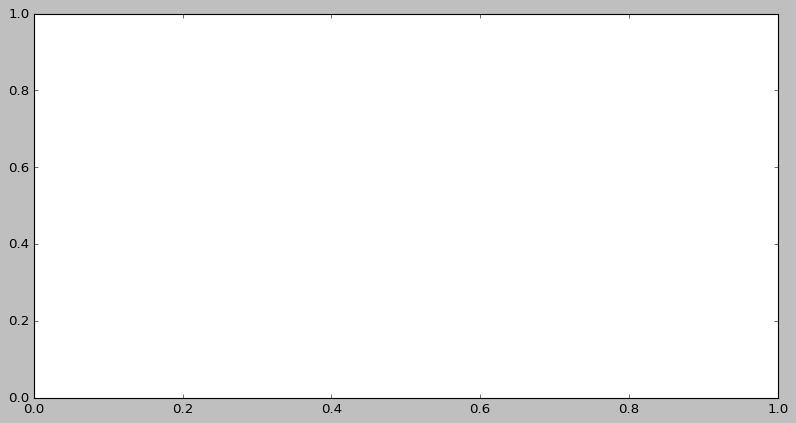

In [4]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(12,6))

### First hyptohesis: decrease in number of recorded attacks over the years

Now I will test the hypothesis that shark attacks have gone down over the years. I will stick to data from 1900, asi data before that was probably not recorded very thoroughly. Also, while data on 2018 should be good, it seems like data has only been uploaded for attacks before jun-25

In [5]:
# Group number of attacks each year, only counting those afgter 1900

annual_attacks = pd.Series(data.year.value_counts().sort_index())
annual_attacks = annual_attacks[(annual_attacks.index.values > 1900) & (annual_attacks.index.values < 2018)]
annual_attacks

1901      9
1902     15
1903     10
1904     14
1905     18
       ... 
2013    122
2014    127
2015    143
2016    130
2017    136
Name: year, Length: 117, dtype: int64

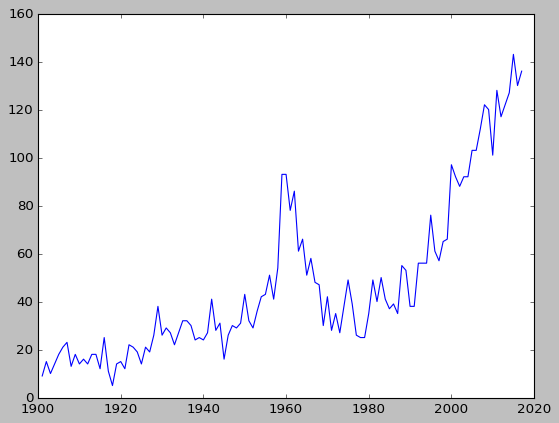

In [6]:
annual_attacks.plot(kind='line',x='annual_attacks.index.value',y='annual attacks')
plt.show()

I hypothesized that recorded shark attacks would have fallen over the years as the global population growth (making sharks look for less populated areas), the overfishing of sharks and the higher knowledge and control over sharks on areas where attacks are common would have reduced the chances that a shark would attack a human. However, it seems that recorded shark attacks have increased greatly in the 20th century. This could be because the recording methods are better, making data more reliable, but there could be other reasons, like those behind the spike in the 1960s

### Second hyptohesis: attack type correlated with the sex of the victim

To test this hypothesis, it is important to have in mind that around 73% of recorded attacks had type 'provoked', so it is likely that this analysis will not offer very valuable insights. Before analyzing the data, I was hoping for a larger variety in attack types that could had offered more insight potential.

In [7]:
# create a series for male and female attacks based on type 

male_attacks_by_type = pd.Series(data.groupby("type")["sex"].apply(lambda x: x[x == 'M'].count()), name = "male_attacks")
female_attacks_by_type = pd.Series(data.groupby("type")["sex"].apply(lambda x: x[x == 'F'].count()), name = "female_attacks")

In [8]:
# combine series in one sub-DF

subdf1 = pd.concat([male_attacks_by_type, female_attacks_by_type], axis = 1)
subdf1

,male_attacks,female_attacks
type,,
Boating,124,9
Invalid,411,62
Provoked,494,22
Questionable,2,0
Sea Disaster,164,9
Unprovoked,3895,535


In [9]:
# convert to percentages to make the data comparable

subdf1['m_att_perc'] = subdf1['male_attacks'].apply(lambda x: x/subdf1['male_attacks'].sum())
subdf1['f_att_perc'] = subdf1['female_attacks'].apply(lambda x: x/subdf1['female_attacks'].sum())

In [10]:
subdf1

,male_attacks,female_attacks,m_att_perc,f_att_perc
type,,,,
Boating,124,9,0.024361,0.014129
Invalid,411,62,0.080747,0.097331
Provoked,494,22,0.097053,0.034537
Questionable,2,0,0.000393,0.000000
Sea Disaster,164,9,0.032220,0.014129
Unprovoked,3895,535,0.765226,0.839874


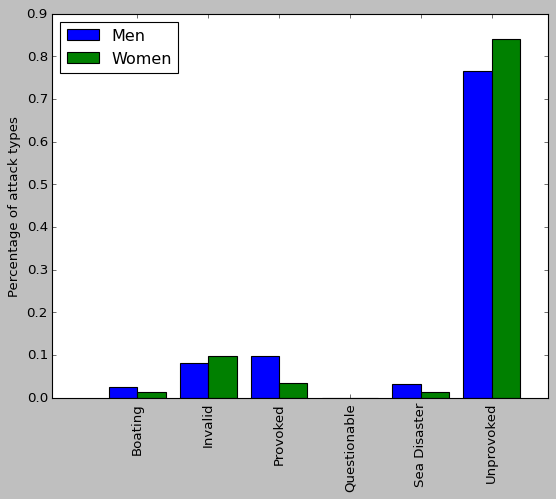

In [11]:
# Grouped bar chart

# Set width for bars
width = 0.4

# Set labels and label location
labels = list(subdf1.index.values)
x = np.arange(len(labels))

# Plot graph
fig, ax = plt.subplots()
bar1 = ax.bar(x, subdf1.m_att_perc, width, label='Men')
bar2 = ax.bar(x + width, subdf1.f_att_perc, width, label='Women')

# Add labels
ax.set_ylabel('Percentage of attack types')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(subdf1.index.values, rotation='vertical')
ax.legend(loc='upper left')

plt.show()

Like commented at the start, the fact that most attacks are unprovoked means the data doesn't offer many valuable insights. However, the data does show that men are more likely to be involved in a provoked attack and women more likely to be involved in an unprovoked attack.

### Third hyptohesis: activity correlated with fatality

It is important to remember that activity had over 1500 unique results, so we will stick with the top 10 activities with most recorded attacks

In [12]:
# Selecting just top 10 activities

top_activities = data.activity.value_counts().head(10)
top_activities_index = top_activities.index
top_activities_index

Index(['Swimming', 'Surfing', 'Fishing', 'Wading', 'Diving', 'Snorkeling',
       'Scuba diving', 'Free diving', 'Body boarding', 'Body surfing'],
      dtype='object')

[Text(0, 0, 'Swimming'),
 Text(1, 0, 'Surfing'),
 Text(2, 0, 'Fishing'),
 Text(3, 0, 'Wading'),
 Text(4, 0, 'Diving'),
 Text(5, 0, 'Snorkeling'),
 Text(6, 0, 'Scuba diving'),
 Text(7, 0, 'Free diving'),
 Text(8, 0, 'Body boarding'),
 Text(9, 0, 'Body surfing')]

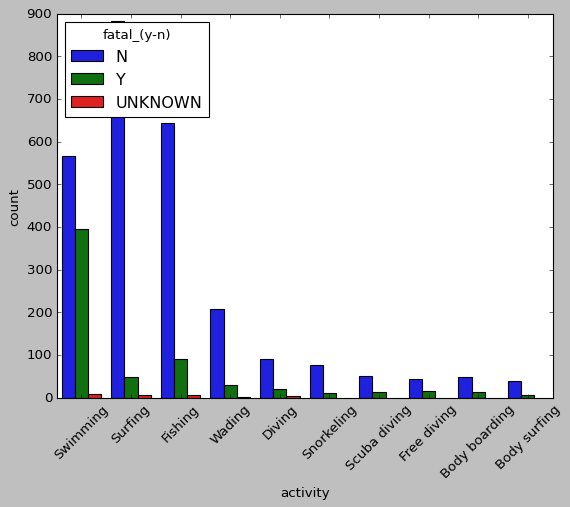

In [13]:
graph3 = sns.countplot(x=data.activity, order=top_activities_index, hue=data['fatal_(y-n)'])
graph3.set_xticklabels(labels=top_activities_index, rotation=45)

There seems to be one clear case when attacks are more likely to be fatal, which is when swimming. In all other activitie, the percentage of fatal cases is relatively small

## Conclusions

From the data analyzed, we can conclude that recorded shark attacks have been increasing over the last century, that most attacls are unprovoked and that swimming is the activity that is most likely to lead to a fatal attack. The lesson is, if in areas where sharks are common, think twice before swimming in the sea as it is the most likely (although still unprobable) way you can end up in a fatal shark attack. 